<a href="https://colab.research.google.com/github/rahulrajbo/Supervised-Model/blob/main/Customer_has_loan_on_credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DOMAIN:Banking and finance**

**CONTEXT:** A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

DATA DESCRIPTION: The data consists of the following attributes:

*   ID: Customer ID
*   Age Customer’s approximate age.
*   CustomerSince: Customer of the bank since. [unit is masked]
*   HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
*   ZipCode: Customer’s zip code.
*   HiddenScore: A score associated to the customer which is masked by the bank as an IP.
*   MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
*   Level: A level associated to the customer which is masked by the bank as an IP.
*   Mortgage: Customer’s mortgage. [unit is masked]
*   Security: Customer’s security asset with the bank. [unit is masked]
*   FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
*   InternetBanking: if the customer uses internet banking.
*   CreditCard: if the customer uses bank’s credit card.
*   LoanOnCard: if the customer has a loan on credit card.

# **Import Libraries**

In [157]:
#Import important libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from collections import Counter
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the Dataset**

In [37]:
# Import dataset
data_1 = pd.read_csv('/content/drive/MyDrive/Machine Learning/Supervised Model/Data1.csv')
data_2 = pd.read_csv('/content/drive/MyDrive/Machine Learning/Supervised Model/Data2.csv')

In [38]:
print(data_1.shape, data_2.shape)

(5000, 8) (5000, 7)


In [39]:
data_1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [40]:
data_2.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [41]:
data_2.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

Here, we observe that the dataset is devided in two parts with part-1 having some of the feature variables and part-2 mainly has binary categorical features such as whether the customer has Security or not, FD or not etc. and the target variable LoanOnCard. We also see that there are 20 customers for whome we do not have Loan information and hence they cannot be used to develop a model to predict whether a customer will opt for Loan or Not as we have no idea whether these customers had a loan in past or not. The two datasets should be merged as one using the ID column to create a final dataset for model building.

In [42]:
# Merge both dataset and make a complete dataset
loan_data = pd.merge(data_1, data_2, how = 'inner', on = 'ID')
loan_data.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

Now, we have a final loan dataset with all information in once dataframe.

In [43]:
loan_data.shape

(5000, 14)

In [44]:
loan_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

'ID' is not required for modelling and hence can be dropped. 'ZipCode' indicates an area and can be considered as a categorical variable instead of being an integer. All binary variable (1---> indicating presence 0 ---> absense are integers and can be directly used in an ML algorithm).

In [45]:
loan_data.Level.unique()

array([1, 2, 3])

In [46]:
loan_data.ZipCode.nunique()

467

Now there are many ZipCodes and the type is integer but one ZipCode greater than another does not make much sense. This is a perfect example of nominal variable with high cardinality. With high cardinality one-hot encoding can be a problem as this will increase the dimentionality of the data. We might use Supervised Ratio transformation to use this feature variable in the model. Instead of using the ZipCode directly we can use Ratio of the number of customers with LoanOnCard as 1 to the total number of customers in that ZipCode. This will capture information like whether a particular ZipCode customer has a high probability of conversion without using a nominal variable with very high cardinality.

We can use historical data to assign this ratio for each ZipCode in the data and can use this for transforming the ZipCode in Production as well

In [47]:
#Supervised ratio transformation for the ZipCodes for those LoanOnCard values which are not null
zipcode = loan_data.loc[loan_data['LoanOnCard'].notnull(),['ZipCode','LoanOnCard']]
zipcode['Count'] = 1
zipcode.head()

ZipCode  LoanOnCard  Count
9     93023         1.0      1
10    94710         0.0      1
11    90277         0.0      1
12    93106         0.0      1
13    94920         0.0      1

In [48]:
zipcode.shape

(4980, 3)

In [49]:
zipcode_transformed = zipcode.groupby('ZipCode').sum()
zipcode_transformed['ZipScore'] = zipcode_transformed['LoanOnCard']/zipcode_transformed['Count']
zipcode_transformed.head()

LoanOnCard  Count  ZipScore
ZipCode                             
9307            0.0      1       0.0
90005           0.0      5       0.0
90007           0.0      6       0.0
90009           0.0      8       0.0
90011           0.0      3       0.0

In [50]:
zipcode_transformed.reset_index(inplace=True)
zipcode_transformed.head()

ZipCode  LoanOnCard  Count  ZipScore
0     9307         0.0      1       0.0
1    90005         0.0      5       0.0
2    90007         0.0      6       0.0
3    90009         0.0      8       0.0
4    90011         0.0      3       0.0

In [51]:
def zip_transform(data, columnName):
    data = pd.merge(zipcode_transformed.loc[:,['ZipCode','ZipScore']],data,how='right',left_on='ZipCode',right_on=columnName)
    return data
loan_data = zip_transform(loan_data,'ZipCode')

In [52]:
loan_data.head()

ZipCode  ZipScore  ID  Age  CustomerSince  HighestSpend  HiddenScore  \
0    91107  0.125000   1   25              1            49            4   
1    90089  0.181818   2   45             19            34            3   
2    94720  0.113772   3   39             15            11            1   
3    94112  0.000000   4   35              9           100            1   
4    91330  0.066667   5   35              8            45            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [53]:
loan_data.drop(['ID','ZipCode'], axis = 1, inplace=True)
loan_data.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
0  0.125000   25              1            49            4   
1  0.181818   45             19            34            3   
2  0.113772   39             15            11            1   
3  0.000000   35              9           100            1   
4  0.066667   35              8            45            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

Id and ZipCode column is not useful in model building so dropping that feature

In [54]:
loan_data.isnull().sum()

ZipScore                0
Age                     0
CustomerSince           0
HighestSpend            0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [55]:
loan_data = loan_data.loc[loan_data['LoanOnCard'].notnull(),:]
loan_data.reset_index(inplace=True)
loan_data.head()

index  ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
0      9  0.176471   34              9           180            1   
1     10  0.111111   65             39           105            4   
2     11  0.062500   29              5            45            3   
3     12  0.070175   48             23           114            2   
4     13  0.071429   59             32            40            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  8.9      3         0         0                    0   
1                  2.4      3         0         0                    0   
2                  0.1      2         0         0                    0   
3                  3.8      3         0         1                    0   
4                  2.5      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         1.0  
1                0           0         0.0  
2                1           0         0.0  
3                0           0         0.0  
4                1           0         0.0

We have very less missing value so we will drop the missing records.

In [56]:
loan_data.drop('index',axis=1,inplace=True)
loan_data.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
0  0.176471   34              9           180            1   
1  0.111111   65             39           105            4   
2  0.062500   29              5            45            3   
3  0.070175   48             23           114            2   
4  0.071429   59             32            40            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  8.9      3         0         0                    0   
1                  2.4      3         0         0                    0   
2                  0.1      2         0         0                    0   
3                  3.8      3         0         1                    0   
4                  2.5      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         1.0  
1                0           0         0.0  
2                1           0         0.0  
3                0           0         0.0  
4                1           0         0.0

In [57]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZipScore             4980 non-null   float64
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   HiddenScore          4980 non-null   int64  
 5   MonthlyAverageSpend  4980 non-null   float64
 6   Level                4980 non-null   int64  
 7   Mortgage             4980 non-null   int64  
 8   Security             4980 non-null   int64  
 9   FixedDepositAccount  4980 non-null   int64  
 10  InternetBanking      4980 non-null   int64  
 11  CreditCard           4980 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 505.9 KB


In [58]:
loan_data['LoanOnCard'] = loan_data['LoanOnCard'].astype(int)

In [59]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZipScore             4980 non-null   float64
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   HiddenScore          4980 non-null   int64  
 5   MonthlyAverageSpend  4980 non-null   float64
 6   Level                4980 non-null   int64  
 7   Mortgage             4980 non-null   int64  
 8   Security             4980 non-null   int64  
 9   FixedDepositAccount  4980 non-null   int64  
 10  InternetBanking      4980 non-null   int64  
 11  CreditCard           4980 non-null   int64  
 12  LoanOnCard           4980 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 505.9 KB


Now our dataset has 4980 record as 20 records dropped since we do not have loan information available for such records. We are now using ZipScore instead of ZipCode. And there are no null values in the dataset. We can now use this data for further processing.

We will see box plots for each numerical feature variables separately for the classes. This will give us an idea of how the distributions vary between the classes.

# **Univariate, Bivariate Analysis**

In [62]:
loan_data.describe()

ZipScore          Age  CustomerSince  HighestSpend  HiddenScore  \
count  4980.000000  4980.000000    4980.000000    4980.00000  4980.000000   
mean      0.096386    45.352610      20.117671      73.85241     2.395582   
std       0.087968    11.464212      11.468716      46.07009     1.147200   
min       0.000000    23.000000      -3.000000       8.00000     1.000000   
25%       0.000000    35.000000      10.000000      39.00000     1.000000   
50%       0.090909    45.000000      20.000000      64.00000     2.000000   
75%       0.142857    55.000000      30.000000      98.00000     3.000000   
max       0.666667    67.000000      43.000000     224.00000     4.000000   

       MonthlyAverageSpend        Level     Mortgage     Security  \
count          4980.000000  4980.000000  4980.000000  4980.000000   
mean              1.939536     1.880924    56.589759     0.104418   
std               1.750006     0.840144   101.836758     0.305832   
min               0.000000     1.000000     0.000000     0.000000   
25%               0.700000     1.000000     0.000000     0.000000   
50%               1.500000     2.000000     0.000000     0.000000   
75%               2.525000     3.000000   101.000000     0.000000   
max              10.000000     3.000000   635.000000     1.000000   

       FixedDepositAccount  InternetBanking   CreditCard   LoanOnCard  
count          4980.000000      4980.000000  4980.000000  4980.000000  
mean              0.060643         0.597189     0.294378     0.096386  
std               0.238697         0.490513     0.455808     0.295149  
min               0.000000         0.000000     0.000000     0.000000  
25%               0.000000         0.000000     0.000000     0.000000  
50%               0.000000         1.000000     0.000000     0.000000  
75%               0.000000         1.000000     1.000000     0.000000  
max               1.000000         1.000000     1.000000     1.000000

Mean and Median of Age,customer since column is nearly equal,So there wont be any skewness

Mean is greater than Median in highestspend and monthly average spend.So Positive skewness will exist

We can see high fluctuation in mortage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers

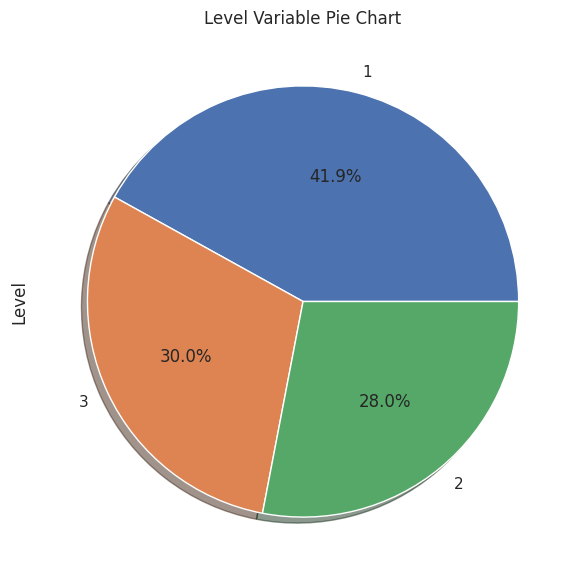

In [78]:
plt.figure(figsize=(17,7))
loan_data['Level'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('Level Variable Pie Chart')
plt.show()

Level 2 and 3 has nearly equal distribution

Level 1 customers are more compared to others

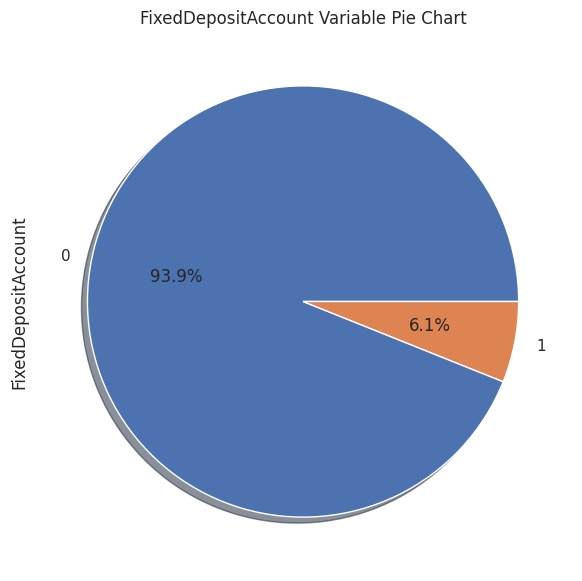

In [76]:
plt.figure(figsize=(17,7))
loan_data['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('FixedDepositAccount Variable Pie Chart')
plt.show()

We can see 93.9% of customers does not have fixed deposit account

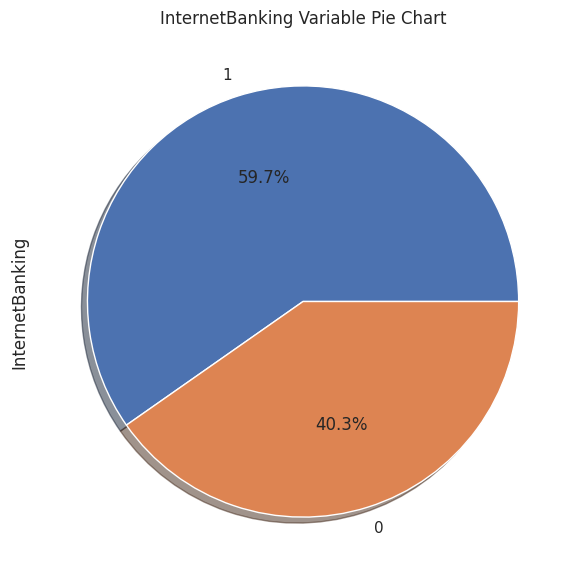

In [74]:
plt.figure(figsize=(17,7))
loan_data['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('InternetBanking Variable Pie Chart')
plt.show()

60 % of people uses internet banking

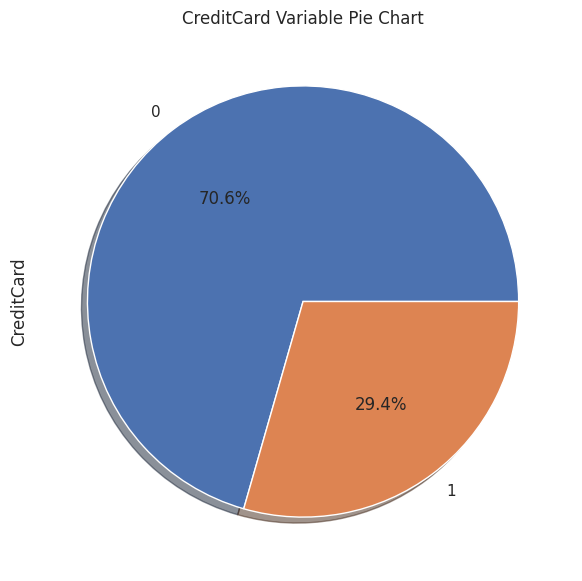

In [80]:
plt.figure(figsize=(17,7))
loan_data['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('CreditCard Variable Pie Chart')
plt.show()

70 % of people uses bank's credit card

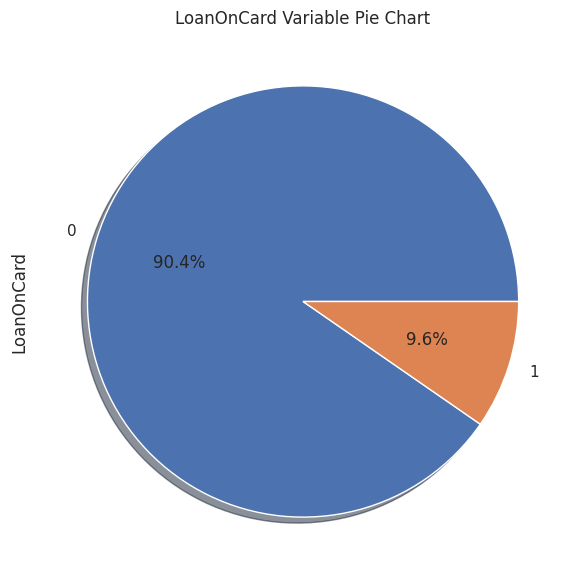

In [81]:
plt.figure(figsize=(17,7))
loan_data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('LoanOnCard Variable Pie Chart')
plt.show()

We can see 90% of people does not have loan on credit card

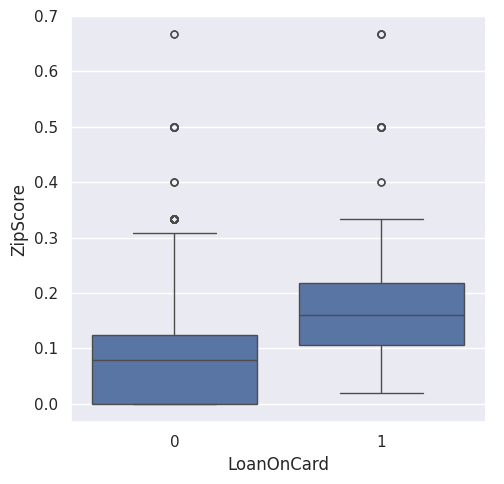

In [82]:
sns.catplot(x="LoanOnCard", y = "ZipScore", data=loan_data, kind="box");

It is great that we see a good separation between the 0 and 1 class using our transformed ZipScore feature.There are a few outliers in the data.

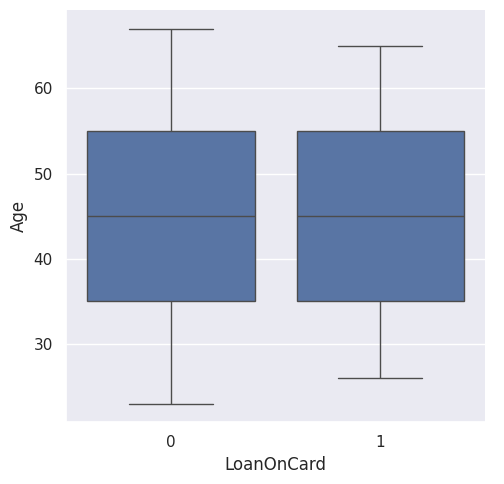

In [83]:
sns.catplot(x="LoanOnCard", y = "Age", data=loan_data, kind="box");

Age does not seem to have a great predictive power as the distribution are very similar for both the classes

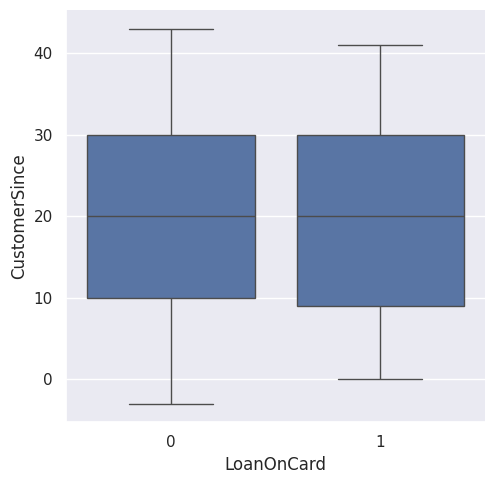

In [84]:
sns.catplot(x="LoanOnCard", y = "CustomerSince", data=loan_data, kind="box");

Customer of the bank since has equal distribution on loan holders and non-loan holders.

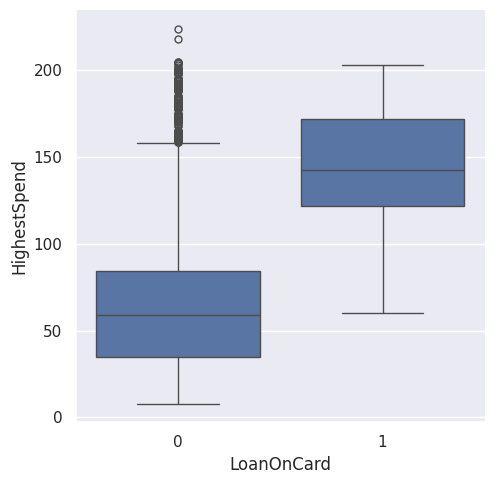

In [85]:
sns.catplot(x="LoanOnCard", y = "HighestSpend", data=loan_data, kind="box");

Highest Spend can be a very useful feature. The distribution is completely different for the two classes. The median for LoanOnCard = 1 is much higher than the 0 class. The customers with LoanOncard has much higher spend.

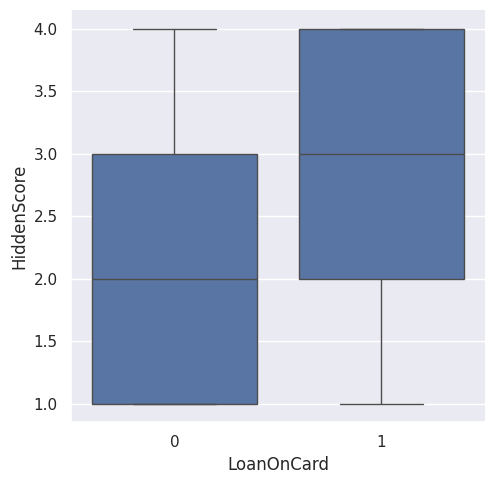

In [86]:
sns.catplot(x="LoanOnCard", y = "HiddenScore", data=loan_data, kind="box");

In [87]:
pd.crosstab(loan_data.HiddenScore,loan_data.LoanOnCard)

LoanOnCard      0    1
HiddenScore           
1            1359  107
2            1187  106
3             873  133
4            1081  134

Although there is overlap but still this feature can be useful to separate the two classes. Score 1 and 2 has greater % of 0 cases and Score 3 and 4 has greater % of 1 cases

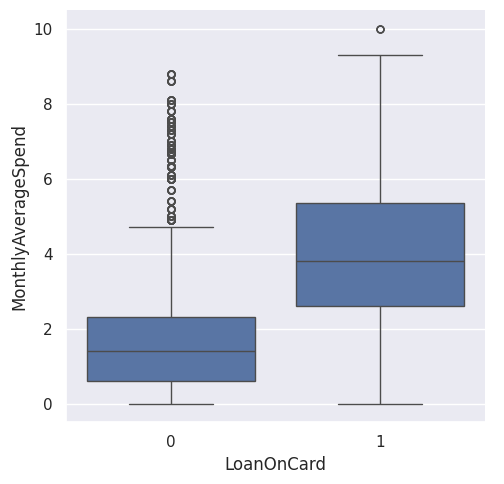

In [88]:
sns.catplot(x="LoanOnCard", y = "MonthlyAverageSpend", data=loan_data, kind="box");

As expected this can be a good differentiator

Monthly average spend is more for loan holders

This column is directly proportional to highest spend

In [89]:
pd.crosstab(loan_data.Level,loan_data.LoanOnCard)

LoanOnCard     0    1
Level                
1           1996   93
2           1213  182
3           1291  205

Higher level has greater % of 1 cases

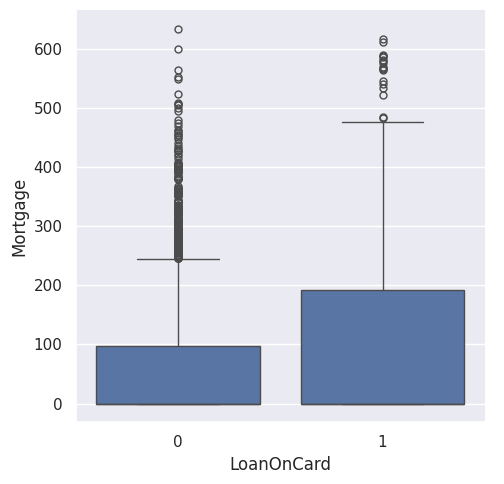

In [90]:
sns.catplot(x="LoanOnCard", y = "Mortgage", data=loan_data, kind="box");

Mortage value is high for loan holders

We can see extreme value in both the cases

In [94]:
pd.crosstab(loan_data.Security,loan_data.LoanOnCard)

LoanOnCard     0    1
Security             
0           4040  420
1            460   60

Most of the cases in both classes fall in 0 security. May not be a very useful feature.

In [95]:
pd.crosstab(loan_data.FixedDepositAccount,loan_data.LoanOnCard)

LoanOnCard              0    1
FixedDepositAccount           
0                    4338  340
1                     162  140

Again majority cases in both classes do not have a FD account

In [96]:
pd.crosstab(loan_data.CreditCard,loan_data.LoanOnCard)

LoanOnCard     0    1
CreditCard           
0           3177  337
1           1323  143

Approximately 70% in both classes had no credit card

In [97]:
pd.crosstab(loan_data.InternetBanking,loan_data.LoanOnCard)

LoanOnCard          0    1
InternetBanking           
0                1817  189
1                2683  291

40 % of the cases in both classes has not internet banking

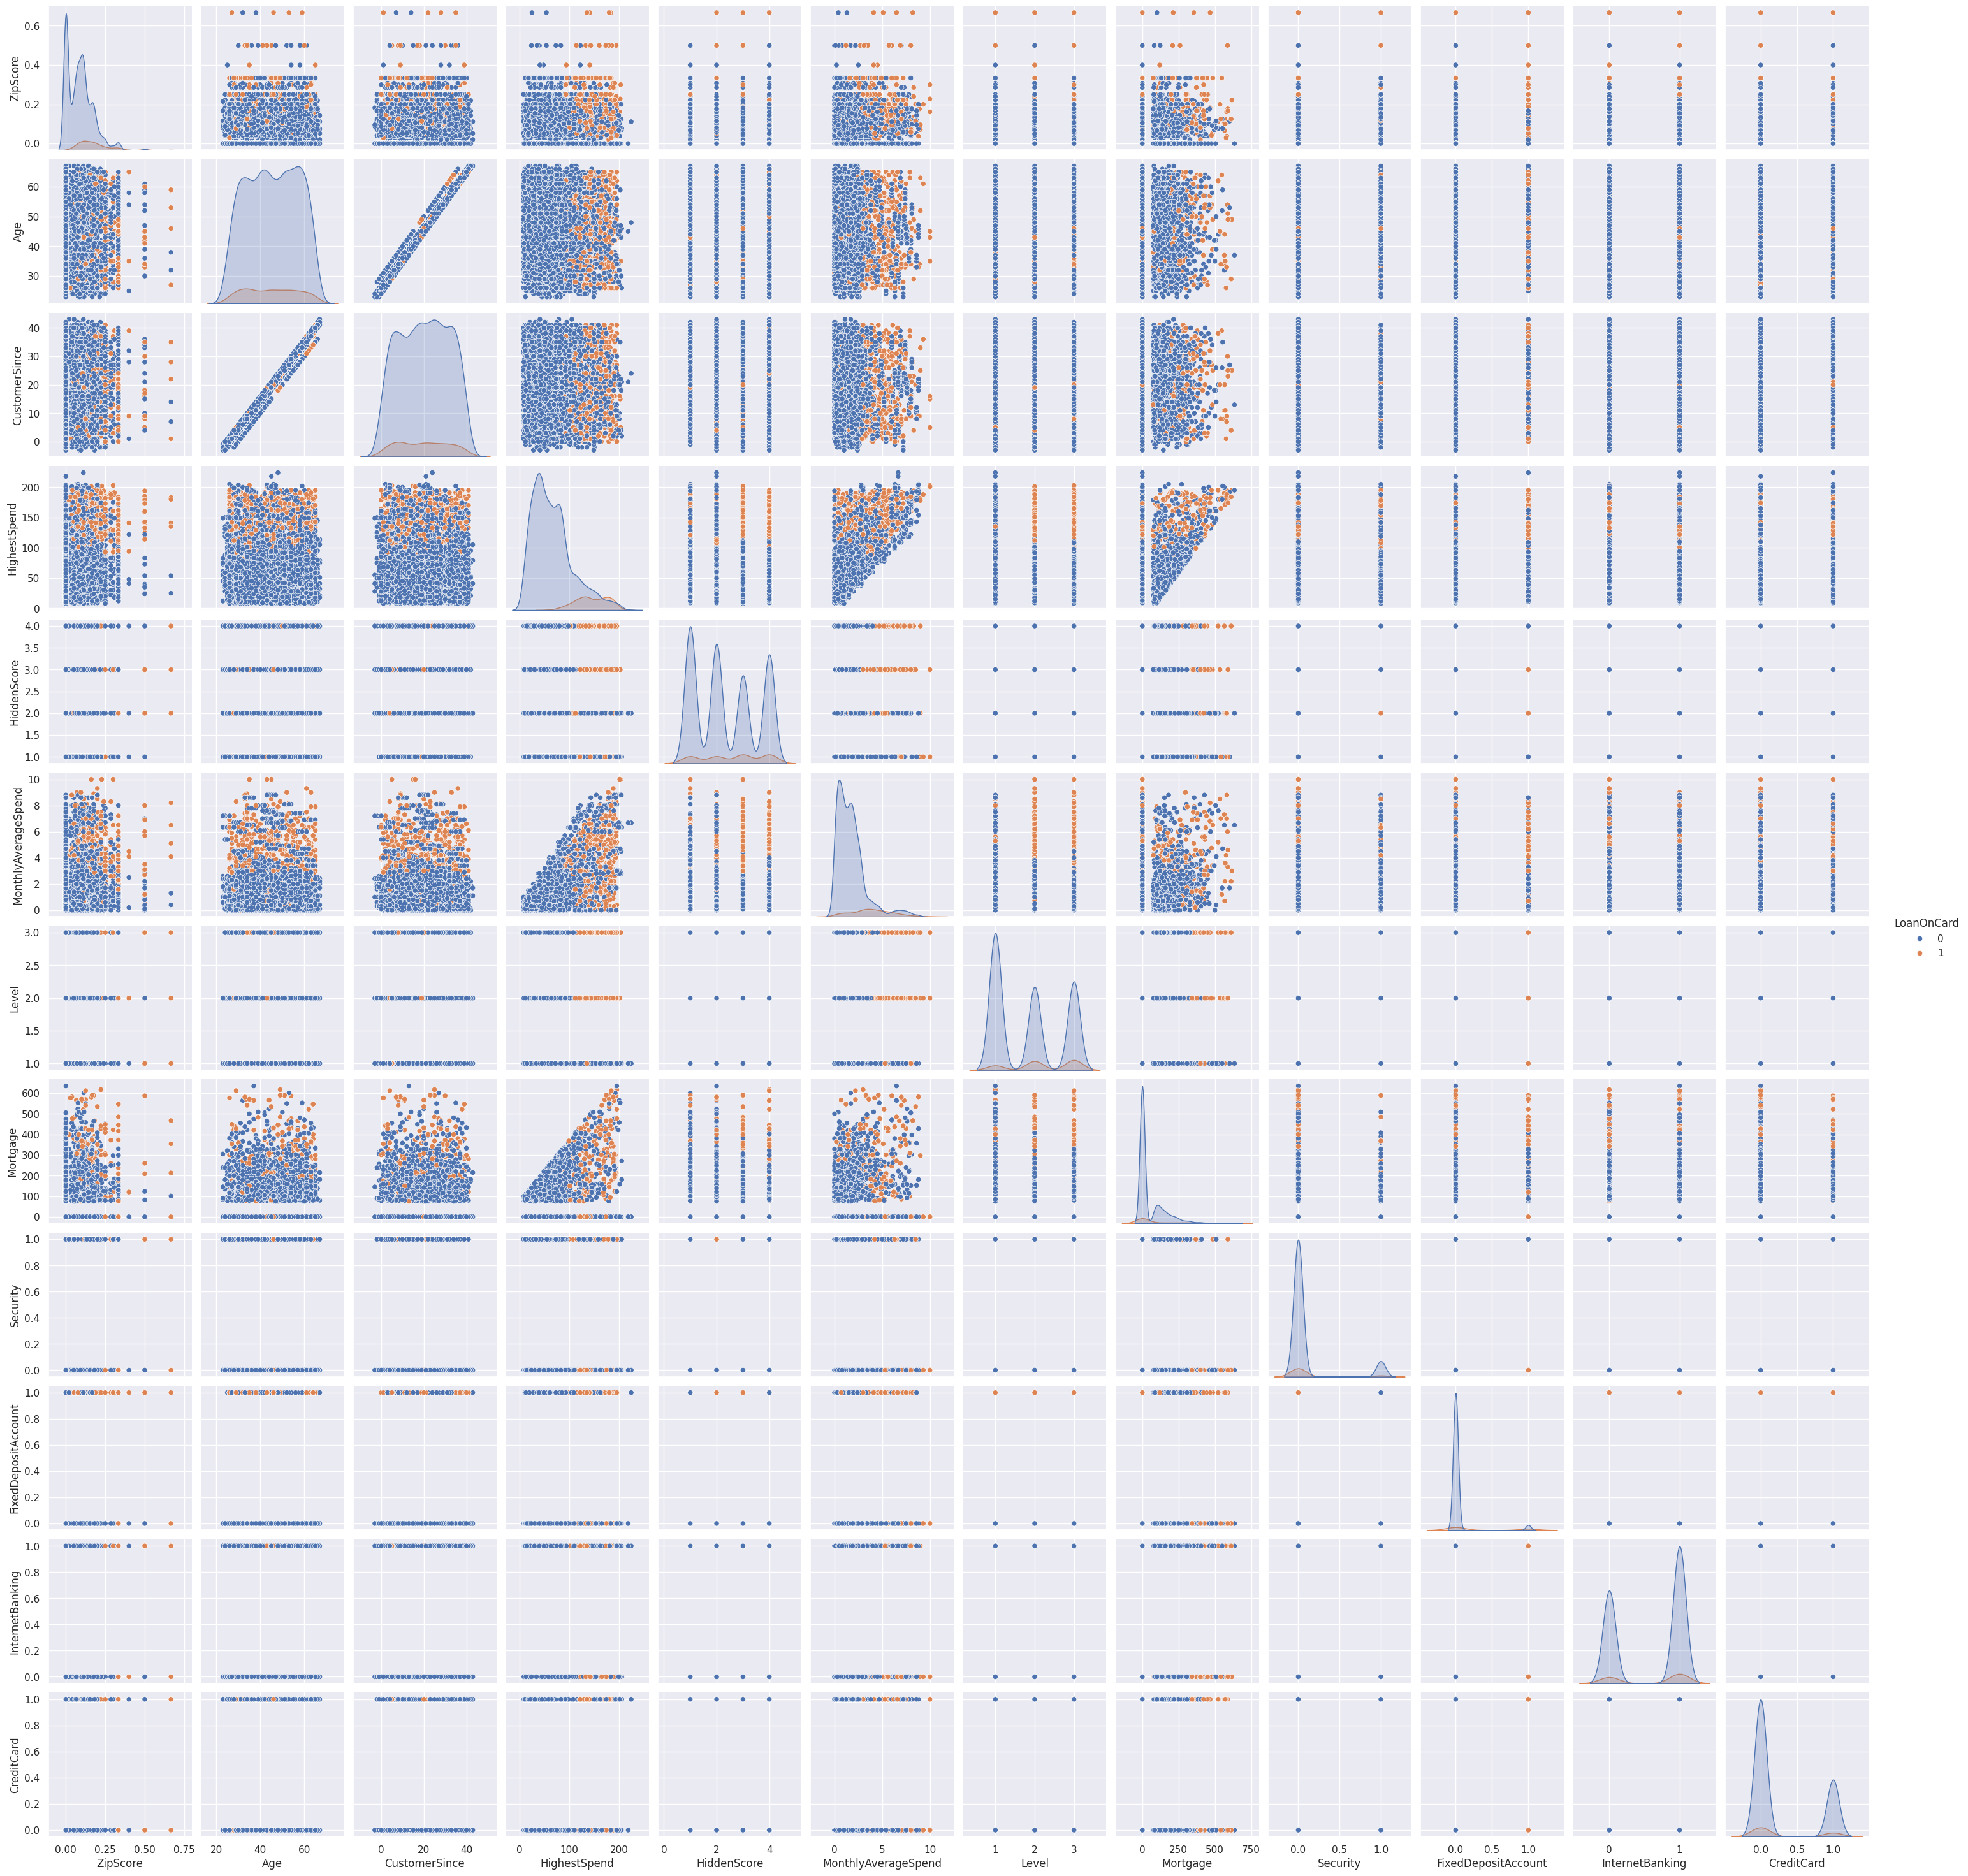

In [98]:

sns.pairplot(loan_data,diag_kind='kde',hue='LoanOnCard');

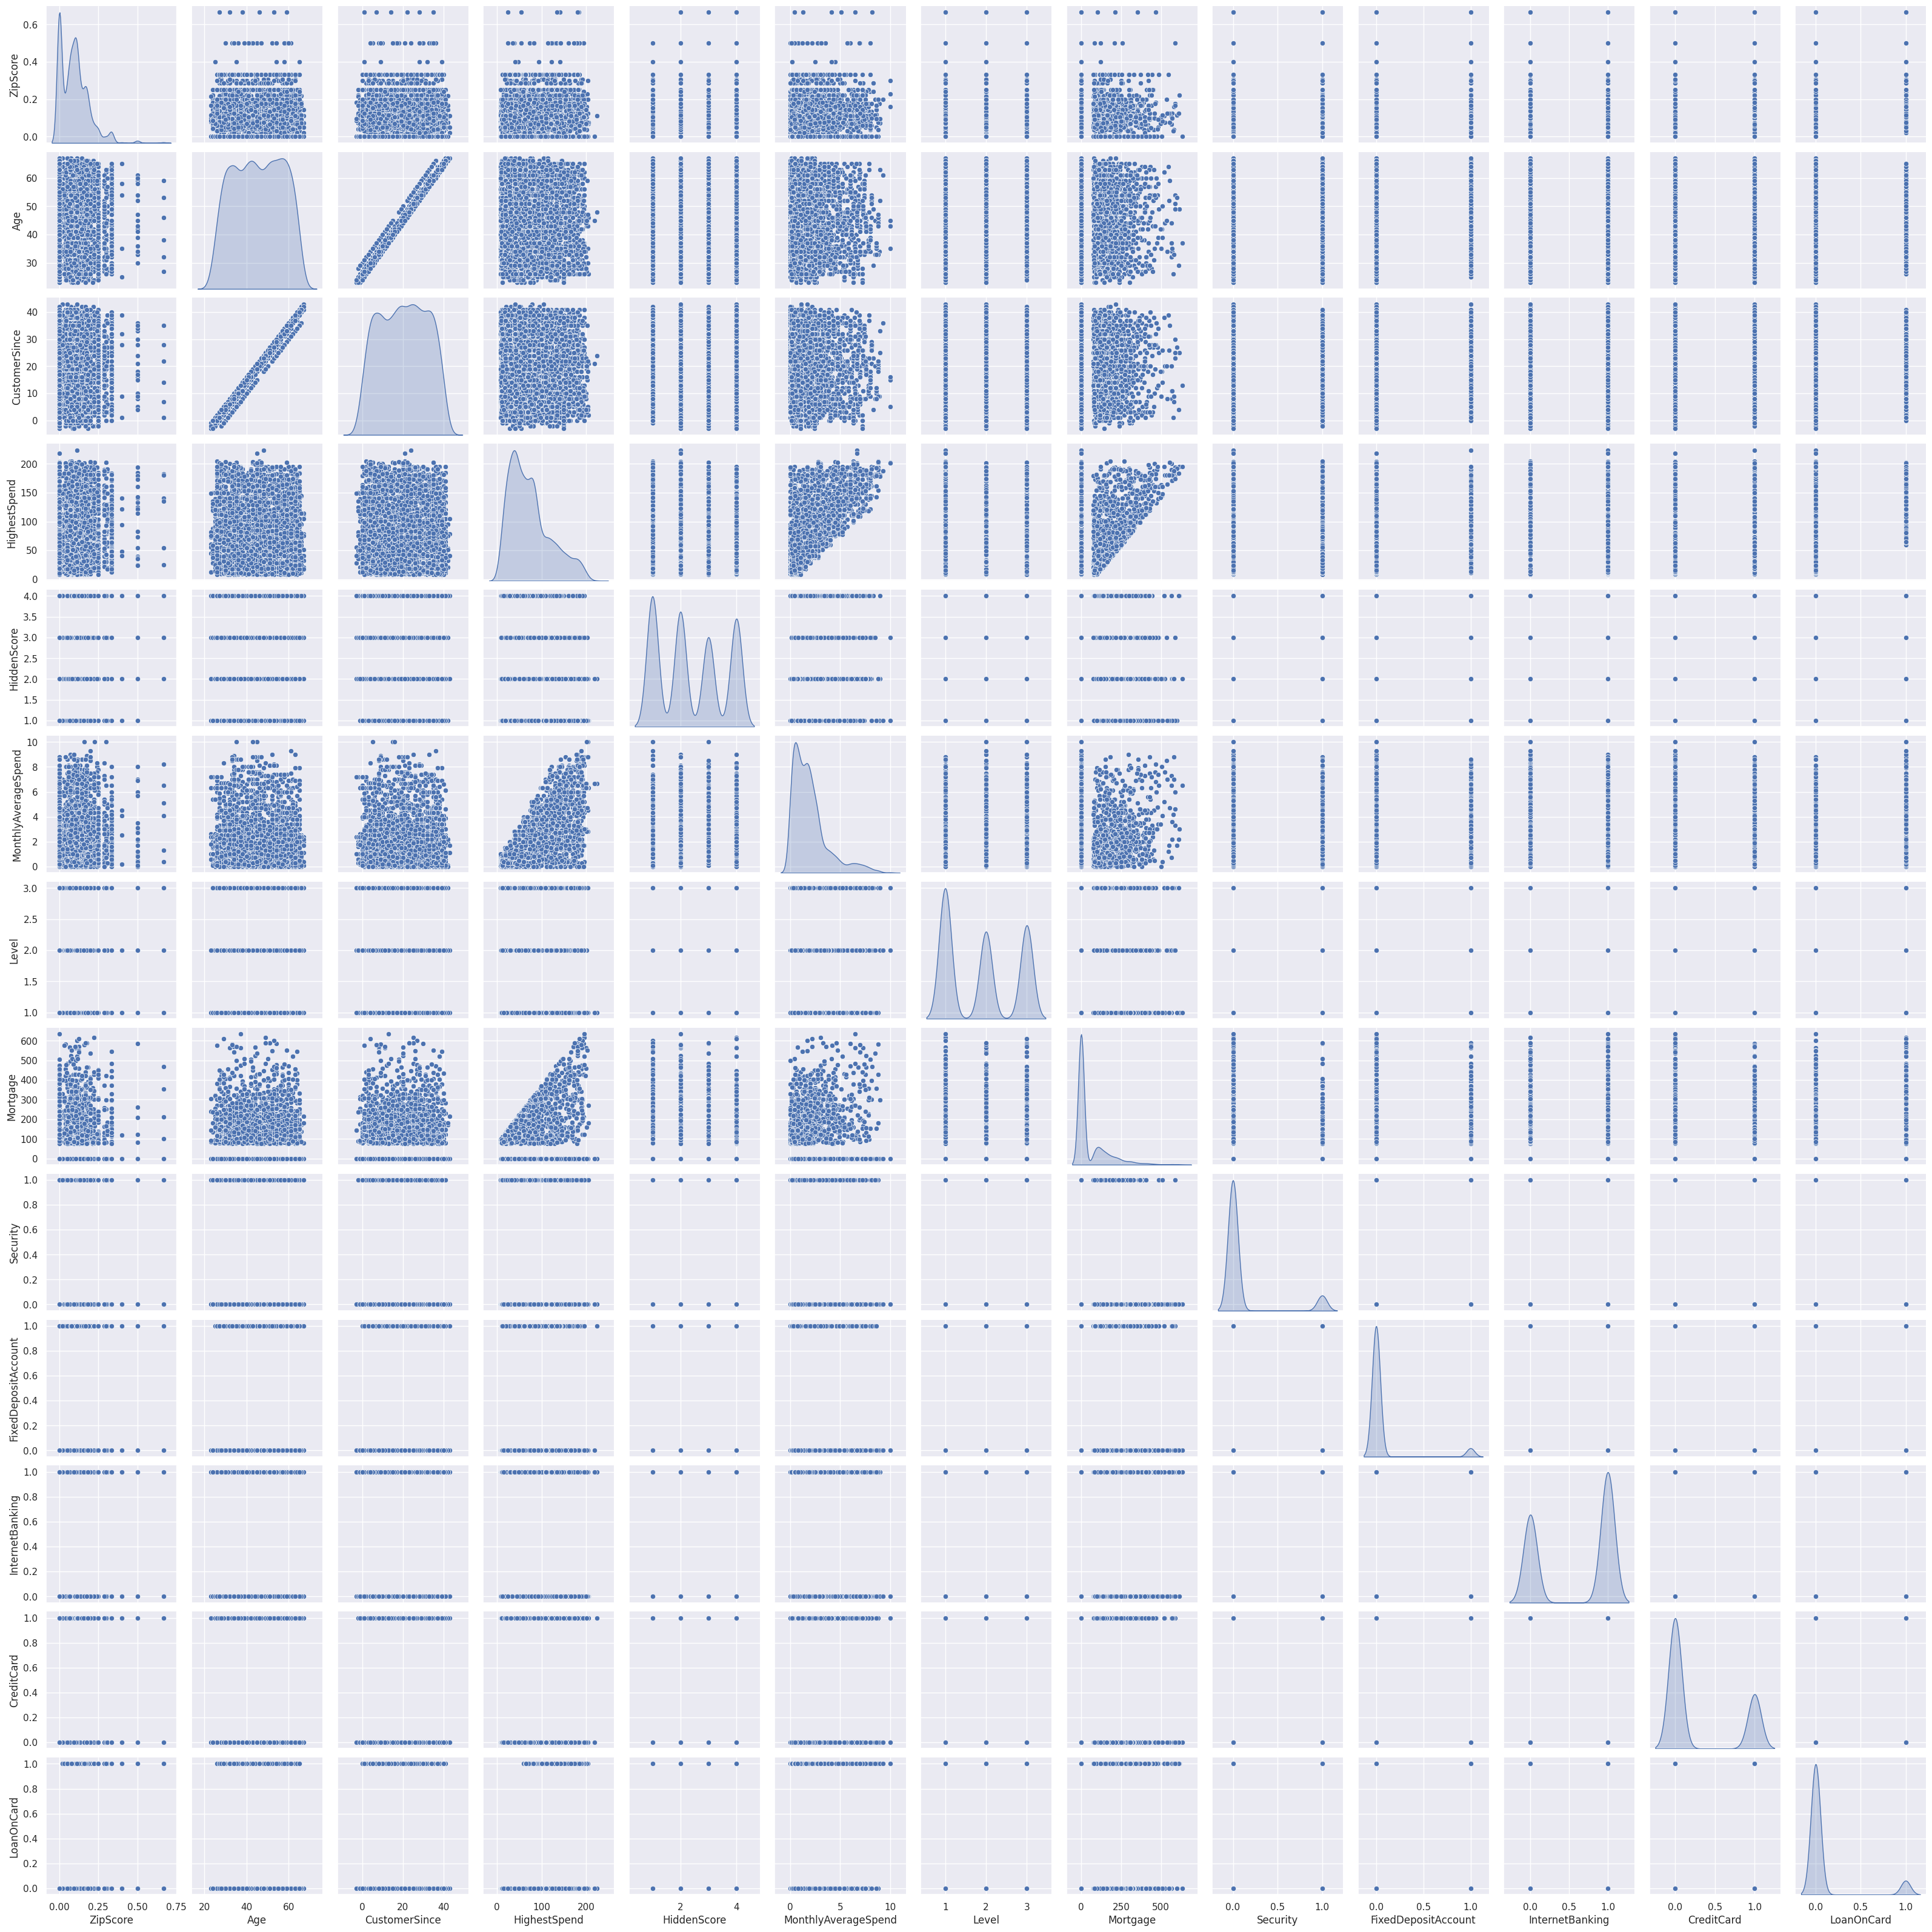

In [99]:
sns.pairplot(loan_data,diag_kind='kde');

In [100]:
#Checking Correlation
loan_data.corr()

ZipScore       Age  CustomerSince  HighestSpend  \
ZipScore             1.000000 -0.021578      -0.019498      0.145042   
Age                 -0.021578  1.000000       0.994208     -0.054951   
CustomerSince       -0.019498  0.994208       1.000000     -0.046092   
HighestSpend         0.145042 -0.054951      -0.046092      1.000000   
HiddenScore          0.017451 -0.045289      -0.051456     -0.158357   
MonthlyAverageSpend  0.124480 -0.051896      -0.049918      0.646109   
Level                0.040437  0.042750       0.014545     -0.188909   
Mortgage             0.019186 -0.013272      -0.011380      0.207236   
Security             0.002484  0.000323      -0.000469     -0.002284   
FixedDepositAccount  0.125216  0.007744       0.010085      0.169535   
InternetBanking      0.017486  0.011227       0.011355      0.014202   
CreditCard           0.033386  0.007344       0.008779     -0.002780   
LoanOnCard           0.298045 -0.008147      -0.007801      0.502626   

                     HiddenScore  MonthlyAverageSpend     Level  Mortgage  \
ZipScore                0.017451             0.124480  0.040437  0.019186   
Age                    -0.045289            -0.051896  0.042750 -0.013272   
CustomerSince          -0.051456            -0.049918  0.014545 -0.011380   
HighestSpend           -0.158357             0.646109 -0.188909  0.207236   
HiddenScore             1.000000            -0.109180  0.065762 -0.021396   
MonthlyAverageSpend    -0.109180             1.000000 -0.137020  0.110275   
Level                   0.065762            -0.137020  1.000000 -0.032863   
Mortgage               -0.021396             0.110275 -0.032863  1.000000   
Security                0.019061             0.015105 -0.009443 -0.005002   
FixedDepositAccount     0.014327             0.136410  0.013982  0.089167   
InternetBanking         0.010900            -0.003475 -0.014556 -0.007044   
CreditCard              0.010784            -0.006577 -0.011766 -0.007600   
LoanOnCard              0.061761             0.366912  0.137010  0.141947   

                     Security  FixedDepositAccount  InternetBanking  \
ZipScore             0.002484             0.125216         0.017486   
Age                  0.000323             0.007744         0.011227   
CustomerSince       -0.000469             0.010085         0.011355   
HighestSpend        -0.002284             0.169535         0.014202   
HiddenScore          0.019061             0.014327         0.010900   
MonthlyAverageSpend  0.015105             0.136410        -0.003475   
Level               -0.009443             0.013982        -0.014556   
Mortgage            -0.005002             0.089167        -0.007044   
Security             1.000000             0.317673         0.014007   
FixedDepositAccount  0.317673             1.000000         0.176082   
InternetBanking      0.014007             0.176082         1.000000   
CreditCard          -0.014518             0.278924         0.004960   
LoanOnCard           0.021982             0.316131         0.006034   

                     CreditCard  LoanOnCard  
ZipScore               0.033386    0.298045  
Age                    0.007344   -0.008147  
CustomerSince          0.008779   -0.007801  
HighestSpend          -0.002780    0.502626  
HiddenScore            0.010784    0.061761  
MonthlyAverageSpend   -0.006577    0.366912  
Level                 -0.011766    0.137010  
Mortgage              -0.007600    0.141947  
Security              -0.014518    0.021982  
FixedDepositAccount    0.278924    0.316131  
InternetBanking        0.004960    0.006034  
CreditCard             1.000000    0.002536  
LoanOnCard             0.002536    1.000000

In [102]:
# However we want to see correlation in graphical representation
def plot_corr(loan_data, size=20):
    corr = loan_data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

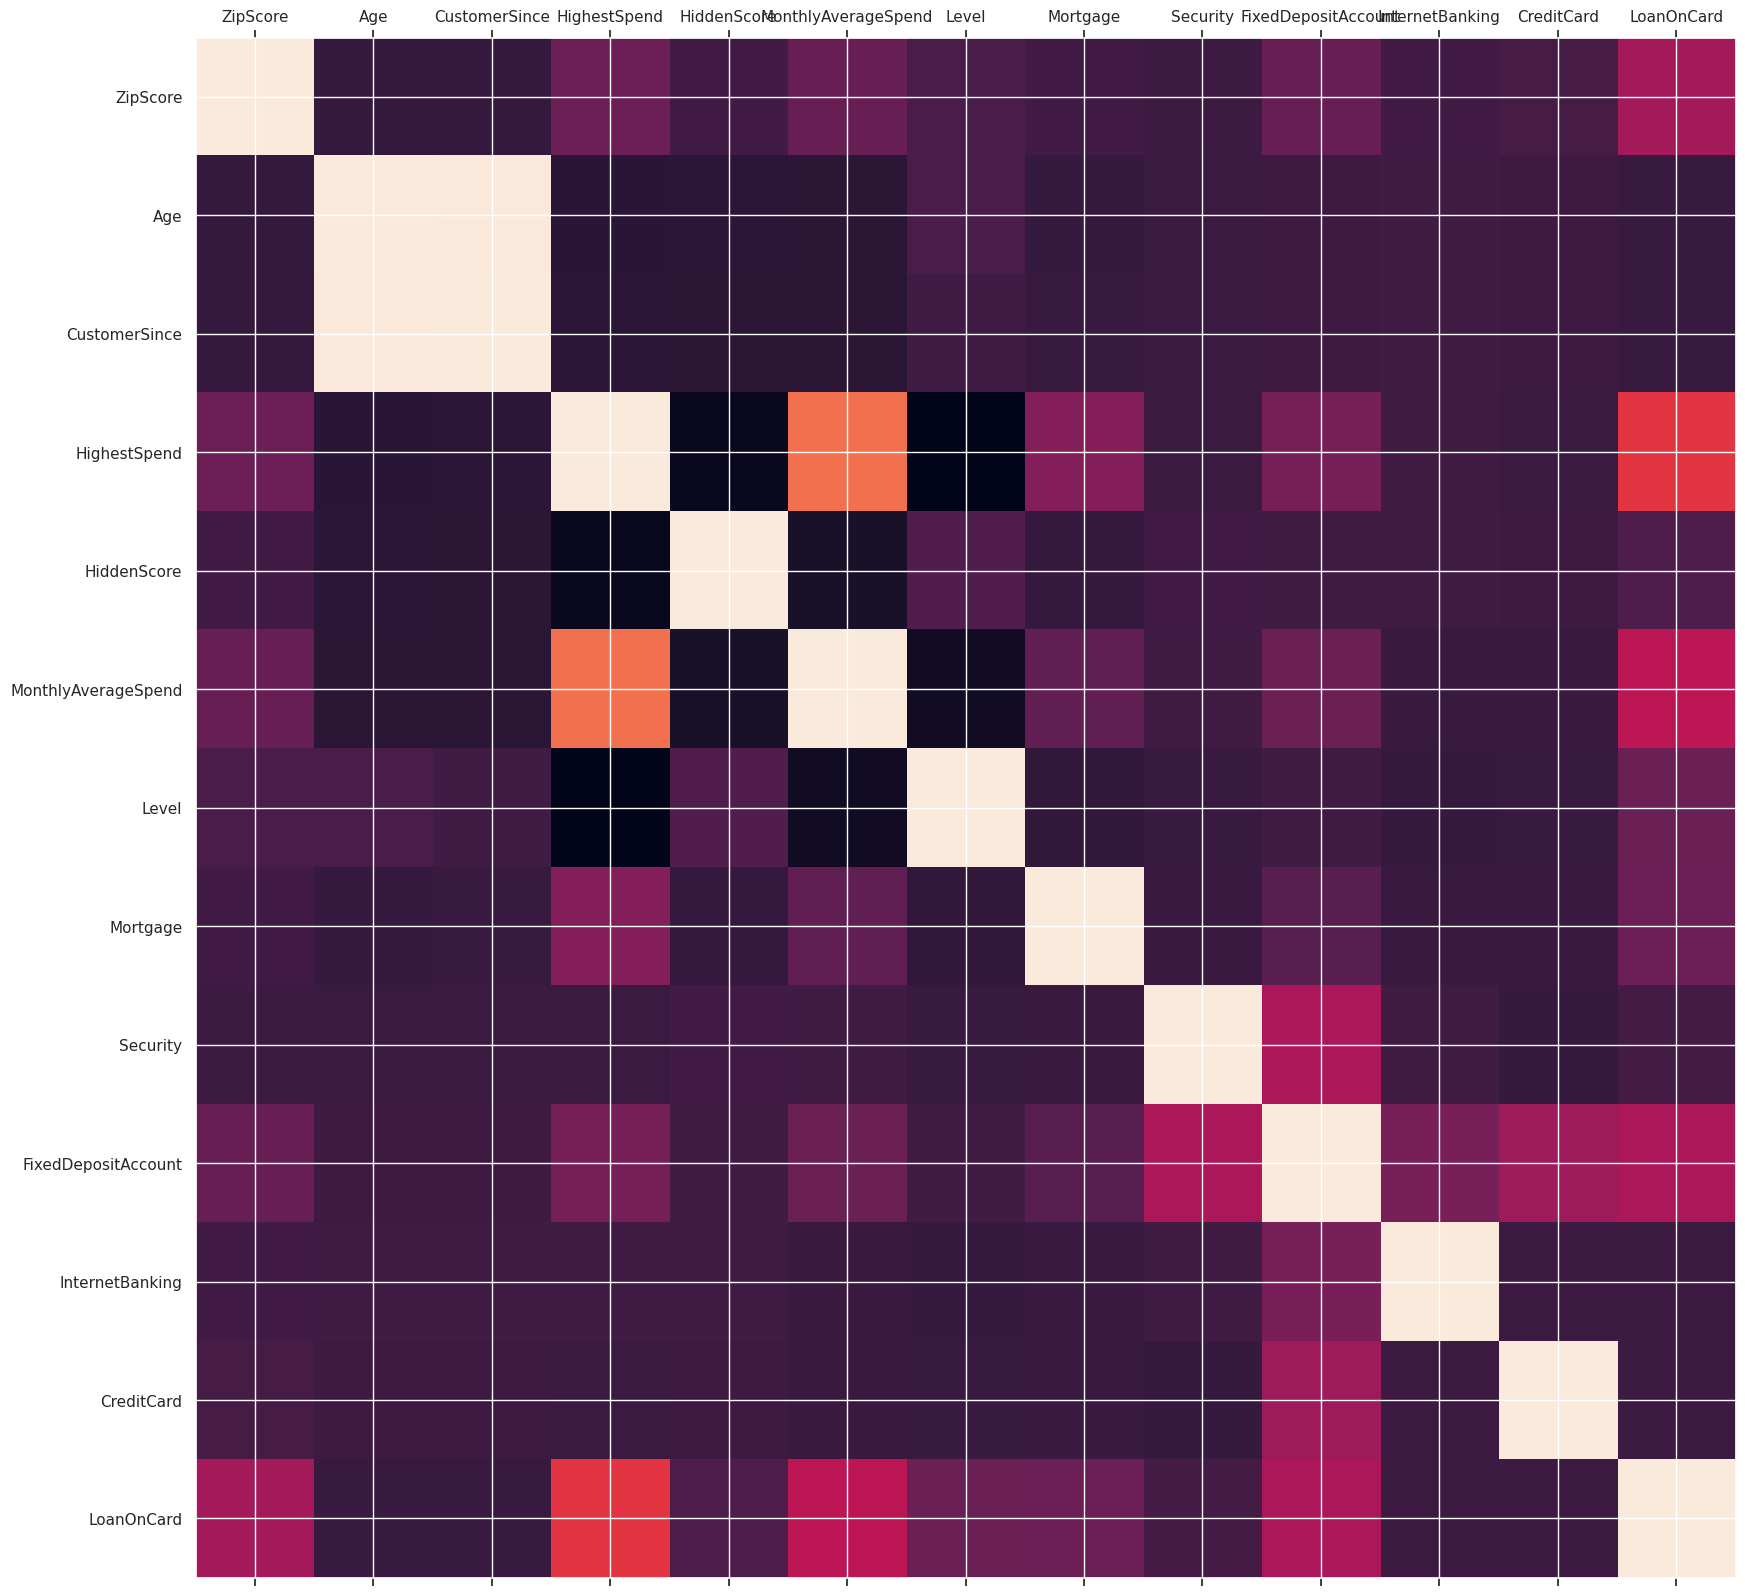

In [103]:
plot_corr(loan_data)

The feature varibales are not highly correlated with each other which is desirable however Age and CustomerSince are highly correlated and we may want to use either one of them in the model

# **Checking ratio of customers with and without LoanOnCard**

In [104]:
#Checking for Class inbalance
l_true = len(loan_data.loc[loan_data['LoanOnCard'] == 1])
l_false = len(loan_data.loc[loan_data['LoanOnCard'] == 0])
print("Number of Loan cases: {0} ({1:2.2f}%)".format(l_true, (l_true / (l_true + l_false)) * 100 ))
print("Number of No Loan cases: {0} ({1:2.2f}%)".format(l_false, (l_false / (l_true + l_false)) * 100))

Number of Loan cases: 480 (9.64%)
Number of No Loan cases: 4500 (90.36%)


Approximately 10% of the customers had a Loan which is an unbalanced distribution. The trained model might be biased towards predicting 0. We may use undersampling, oversampling or class weight to improve model accuracies and other performance metric. We will first try to fit a model with existing distribution and then can experiment with class weights or undersampling of the dominant class to get a better model.

# **Train and Test Split**

In [105]:
#We will use a 75:25 split for the training and test set
from sklearn.model_selection import train_test_split

x = loan_data.drop('LoanOnCard',axis=1)     # Predictor feature columns
y = loan_data['LoanOnCard']   # Predicted class (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)
# 1 is just any random seed number

x_train.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
2581  0.062500   50             24            32            1   
1982  0.125000   30              4           142            3   
53    0.181818   42             18            22            1   
1838  0.000000   35             11            65            3   
2660  0.160000   60             30            31            1   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
2581                  1.4      3       167         0                    0   
1982                  4.2      1       359         0                    0   
53                    1.0      1         0         0                    0   
1838                  2.8      1       240         0                    0   
2660                  1.5      3         0         0                    0   

      InternetBanking  CreditCard  
2581                0           0  
1982                0           0  
53                  0           0  
1838                1           0  
2660                1           0

In [106]:
y_train.head()

2581    0
1982    1
53      0
1838    0
2660    0
Name: LoanOnCard, dtype: int64

In [107]:
#Check the split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan_data.index)) * 100))

75.00% data is in training set
25.00% data is in test set


In [108]:
#Check the proportion of customer with and without loans
print("Original Customer with Loan    : {0} ({1:0.2f}%)".format(len(loan_data.loc[loan_data['LoanOnCard'] == 1]), (len(loan_data.loc[loan_data['LoanOnCard'] == 1])/len(loan_data.index)) * 100))
print("Original Customer without  Loan   : {0} ({1:0.2f}%)".format(len(loan_data.loc[loan_data['LoanOnCard'] == 0]), (len(loan_data.loc[loan_data['LoanOnCard'] == 0])/len(loan_data.index)) * 100))
print("")
print("Training Customer with Loan    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Customer without  Loan   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Customer with Loan        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Customer without  Loan       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Customer with Loan    : 480 (9.64%)
Original Customer without  Loan   : 4500 (90.36%)

Training Customer with Loan    : 364 (9.75%)
Training Customer without  Loan   : 3371 (90.25%)

Test Customer with Loan        : 116 (9.32%)
Test Customer without  Loan       : 1129 (90.68%)



Thus we see that the ratio is maintained between the train and test group and it is aligned with the original data

Out data is ready to fit a model

In [109]:
x_train.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
2581  0.062500   50             24            32            1   
1982  0.125000   30              4           142            3   
53    0.181818   42             18            22            1   
1838  0.000000   35             11            65            3   
2660  0.160000   60             30            31            1   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
2581                  1.4      3       167         0                    0   
1982                  4.2      1       359         0                    0   
53                    1.0      1         0         0                    0   
1838                  2.8      1       240         0                    0   
2660                  1.5      3         0         0                    0   

      InternetBanking  CreditCard  
2581                0           0  
1982                0           0  
53                  0           0  
1838                1           0  
2660                1           0

In [110]:
y_train.head()

2581    0
1982    1
53      0
1838    0
2660    0
Name: LoanOnCard, dtype: int64

In [111]:
x_test.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
1505  0.105263   43             18            58            1   
4133  0.029412   50             26           148            2   
3501  0.078431   36             10            30            2   
3302  0.181818   41             16           104            1   
1206  0.181818   60             36            14            2   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
1505                  2.4      1         0         0                    0   
4133                  6.8      1         0         0                    0   
3501                  0.8      3         0         0                    0   
3302                  4.0      3         0         0                    1   
1206                  0.3      1       109         0                    0   

      InternetBanking  CreditCard  
1505                0           0  
4133                1           0  
3501                1           0  
3302                1           1  
1206                1           1

In [112]:
y_test.head()

1505    0
4133    0
3501    0
3302    0
1206    0
Name: LoanOnCard, dtype: int64

# **Logistic Regression**

In [113]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0  5.438217 -0.42395  0.429299  0.050179  0.630577  0.099471  1.678302   

          7         8         9        10        11  intercept  
0  0.000557 -0.766979  3.161875 -0.620617 -0.929278  -2.521464  


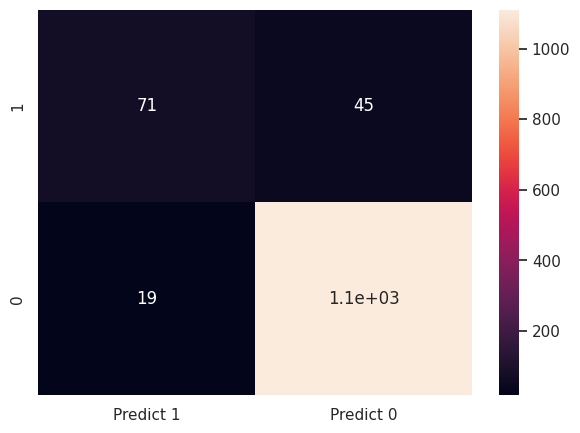

In [114]:
#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [115]:
model_score = model.score(x_test, y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.9485943775100402
Recall =  0.6120689655172413
Precision =  0.7888888888888889


If the predictor variables has a good separation capability we can get good accuracy even with an unbalanced class distribution as we can see from the above accuracy measure. However, accuracy may not always be the best measure of the model performance particularly for unbalanced classes. We see that the recall of this model is very low (around 61%). This means that we are not able to identify all 1 cases properly. The objective of the model is to maximize coversion ratio and hence we do not want to miss on many actual true cases. Therefore, in addition to accuracy we need to consider recall as well (the ability of the model to identify True cases) but at the same time precision of the prediction should not be very low as we have limited budget.

We have earlier seen that Age and CustomerSince are highly correlated and hence only one of them should be included in the model.

Recall = TP/(TP+FN) ---> The capability of the model to identify True cases

Precision = TP/(TP+FP) ---> How efficient out targeting will be. That means in order to correctly identify all True cases how may False cases will get some campaigns (High precision will help save money as we will not be targeting actual False cases)

We will drop CustomerSince from our model and play with class weights to see if we can get a model that can achieve our objective

          0         1         2         3         4         5         6  \
0  4.992049 -0.011738  0.041252  0.442067  0.087013  1.214948  0.000308   

         7         8         9       10  intercept  
0 -0.78647  3.057699 -0.650772 -0.95178  -9.880145  


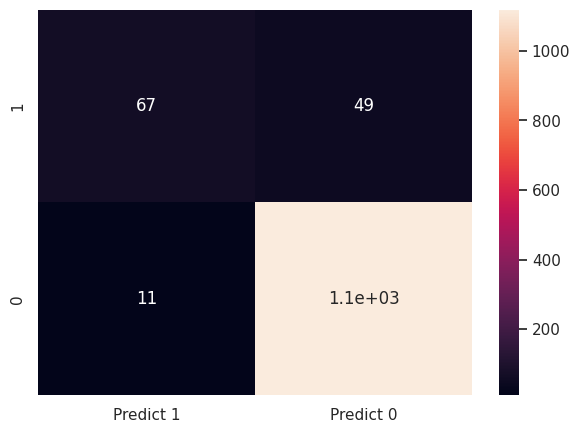

In [116]:
#Dropping CustomerSince (not inplace) to check the effect
model = LogisticRegression(solver="liblinear")
model.fit(x_train.drop('CustomerSince',axis=1), y_train)
#predict on test
y_predict = model.predict(x_test.drop('CustomerSince',axis=1))
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [117]:
model_score = model.score(x_test.drop('CustomerSince',axis=1), y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.9518072289156626
Recall =  0.5775862068965517
Precision =  0.8589743589743589


Although the accuracy improved slightly but the recall has gone down even further.

Let us try some adjustments using class weights to compensate for unbalanced class distribution

          0        1       2         3         4         5         6  \
0  6.952171 -0.28762  0.2911  0.049878  0.562646  0.188265  1.378511   

          7         8         9        10        11  intercept  
0  0.000107 -0.942144  3.447604 -0.693595 -0.975225  -3.358132  


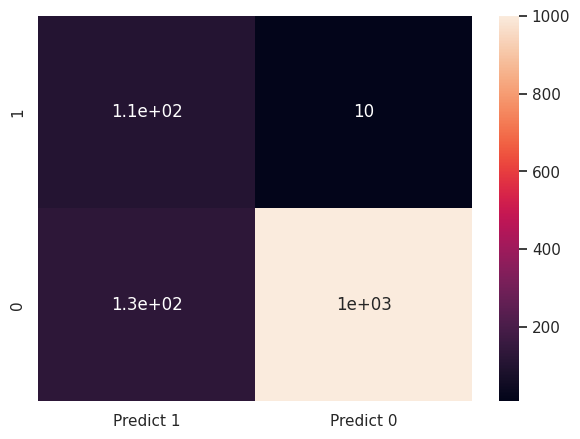

In [118]:
model = LogisticRegression(solver="liblinear", class_weight = 'balanced')
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [119]:
model_score = model.score(x_test, y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.8883534136546185
Recall =  0.9137931034482759
Precision =  0.451063829787234


Balanced Class weight has improved recall drastically however the precision and accuracy has gone down

**Using explicit class weights**

          0        1         2         3         4         5         6  \
0  7.315507 -0.30415  0.309359  0.050013  0.608459  0.143666  1.510133   

          7        8         9        10        11  intercept  
0  0.000311 -0.95101  3.488685 -0.675186 -0.987122  -4.120365  


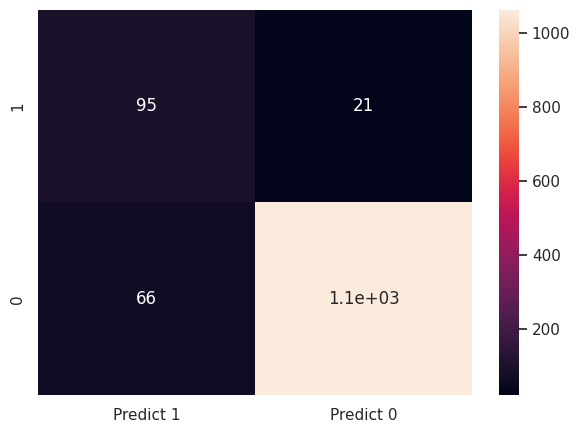

In [120]:
model = LogisticRegression(solver="liblinear", class_weight = {0:1,1:4})
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [121]:
#Performance metrics in test set
model_score = model.score(x_test, y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.9301204819277108
Recall =  0.8189655172413793
Precision =  0.5900621118012422


In [122]:
#Performance metrics in training set
model_score = model.score(x_train, y_train)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_train,model.predict(x_train)))
print('Precision = ', sklearn.metrics.precision_score(y_train,model.predict(x_train)))

0.9427041499330656
Recall =  0.8543956043956044
Precision =  0.6588983050847458


In [123]:
#Complete Classification report on Test Set
print("Classification Report")
print(sklearn.metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.59      0.82      0.69       116
           0       0.98      0.94      0.96      1129

    accuracy                           0.93      1245
   macro avg       0.79      0.88      0.82      1245
weighted avg       0.94      0.93      0.94      1245



With explicit class weights (class 1 getting 4 times more weight than class 0) we are getting approximately 82% recall with 93% accuracy. Precision of this model is also 66%. This means we are correctly identifying 82% actual True Cases and in order to capture this 82% customers we are having a precision of 66%. This means out of the total targeted customer base approximately 66% will be actual True cases. This is a very decent model that can be used to achive the mentioned objective of double digit conversion with a better targeting startegy.

Please note that here the probability cut off is 0.5. We can modify that using a decile analysis to capture more actual True cases may be by targeting the first three deciles.

# **KNN Classifier**

In [125]:
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN.fit(x_train, y_train)
predicted_labels = KNN.predict(x_test)
KNN.score(x_test, y_test)

0.9060240963855422

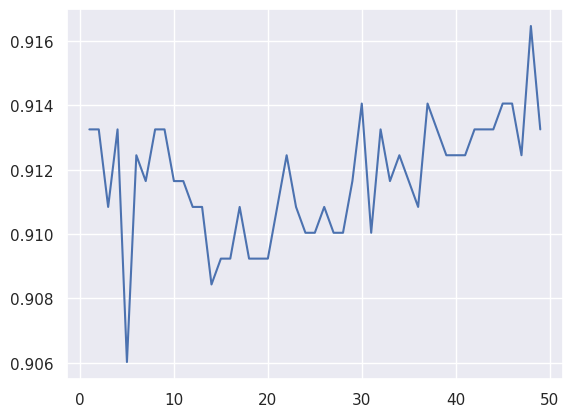

In [126]:
scores =[]
r = range(1,50)
for k in r:
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN.fit(x_train, y_train)
    scores.append(KNN.score(x_test, y_test))
plt.plot(range(1,50),scores);

In [127]:
k_range = pd.concat([pd.Series(r),pd.Series(scores)], axis = 1 , sort = True)
k_range.columns = ['k', 'accuracy']
k_range.head()

k  accuracy
0  1  0.913253
1  2  0.913253
2  3  0.910843
3  4  0.913253
4  5  0.906024

In [128]:
print('Optimal K = {}'.format(k_range.loc[k_range['accuracy'].idxmax(),'k']))

Optimal K = 48


Using the best value of K to finalize the KNN classifier model

In [129]:
KNN = KNeighborsClassifier(n_neighbors= 48 , weights = 'distance' )
KNN.fit(x_train, y_train)
predicted_labels = KNN.predict(x_test)
print(KNN.score(x_train, y_train))
print(KNN.score(x_test, y_test))

1.0
0.9164658634538153


In [ ]:
predicted_labels[0:11]

Confusion Matrix


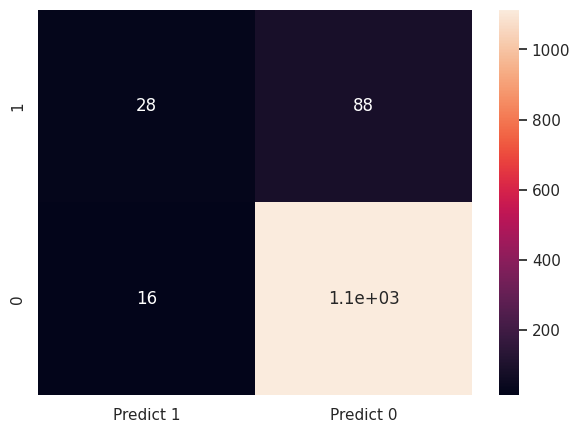

In [131]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [132]:
print('Recall = ', sklearn.metrics.recall_score(y_test,predicted_labels, average = 'weighted'))
print('Precision = ', sklearn.metrics.precision_score(y_test,predicted_labels, average = 'weighted'))

Recall =  0.9164658634538153
Precision =  0.8996737232785504


# **Decision Tree**

In [174]:
# Fit the model on training data with splitting criteria = Gini
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [175]:
predicted_labels = dtree.predict(x_test)

In [176]:
# Find the score
print(dtree.score(x_train, y_train))
print(dtree.score(x_test, y_test))

1.0
0.9839357429718876


In [177]:
# Find Features Importance
print(pd.DataFrame(dtree.feature_importances_, columns = ['Imp'], index = x_train.columns))

                          Imp
ZipScore             0.031717
Age                  0.018588
CustomerSince        0.008642
HighestSpend         0.330803
HiddenScore          0.143996
MonthlyAverageSpend  0.070431
Level                0.380146
Mortgage             0.001087
Security             0.001522
FixedDepositAccount  0.011039
InternetBanking      0.002029
CreditCard           0.000000


Confusion Matrix


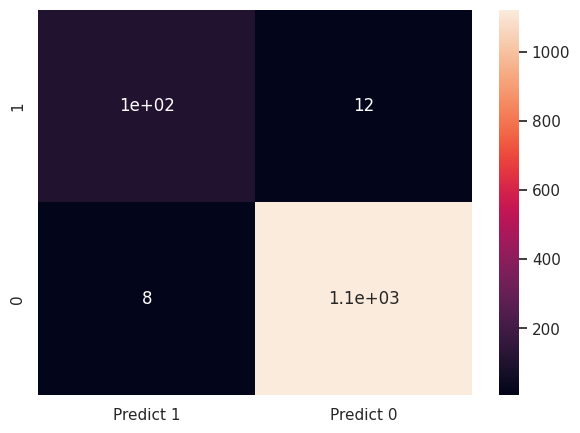

In [178]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [179]:
print('Recall = ', sklearn.metrics.recall_score(y_test,predicted_labels, average = 'weighted'))
print('Precision = ', sklearn.metrics.precision_score(y_test,predicted_labels, average = 'weighted'))

Recall =  0.9839357429718876
Precision =  0.9837402820207828


# **Bagging**

In [180]:
# Fit model on training data with dtree as estimator
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
bag = BaggingClassifier(base_estimator = dtree, n_estimators = 50, random_state = 1)
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [181]:
predicted_labels = bag.predict(x_test)

In [182]:
# Find the score
print(bag.score(x_train, y_train))
print(bag.score(x_test, y_test))

1.0
0.9855421686746988


Confusion Matrix


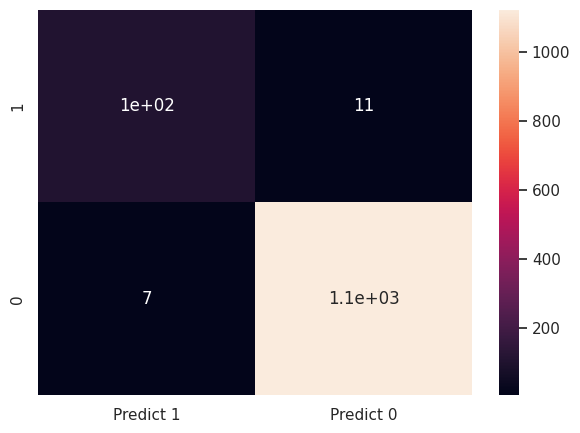

In [183]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [184]:
print('Recall = ', sklearn.metrics.recall_score(y_test,predicted_labels, average = 'weighted'))
print('Precision = ', sklearn.metrics.precision_score(y_test,predicted_labels, average = 'weighted'))

Recall =  0.9855421686746988
Precision =  0.9853725581939408


# **Random Forest**

In [185]:
# Fit model on training data
random = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 3)
random.fit(x_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=50, random_state=1)

In [186]:
predicted_labels = random.predict(x_test)

In [187]:
# Find the score
print(random.score(x_train, y_train))
print(random.score(x_test, y_test))

1.0
0.98714859437751


In [188]:
# Find Features Importance
print(pd.DataFrame(random.feature_importances_, columns = ['Imp'], index = x_train.columns))

                          Imp
ZipScore             0.081459
Age                  0.029452
CustomerSince        0.031044
HighestSpend         0.321510
HiddenScore          0.100600
MonthlyAverageSpend  0.144328
Level                0.190926
Mortgage             0.033024
Security             0.003910
FixedDepositAccount  0.051295
InternetBanking      0.007069
CreditCard           0.005383


Confusion Matrix


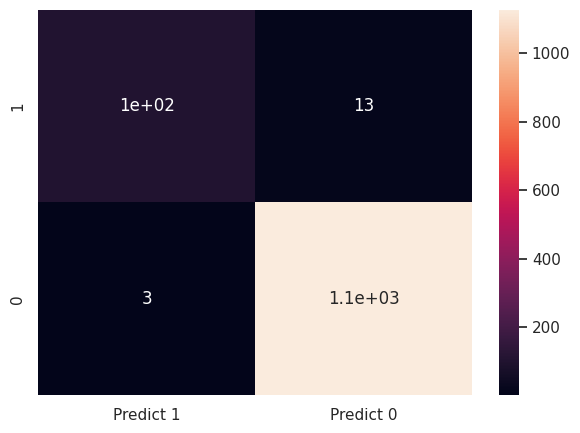

In [189]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [190]:
print('Recall = ', sklearn.metrics.recall_score(y_test,predicted_labels, average = 'weighted'))
print('Precision = ', sklearn.metrics.precision_score(y_test,predicted_labels, average = 'weighted'))

Recall =  0.98714859437751
Precision =  0.987012944850118


# **Ada Boosting**

In [191]:
# Fit model on training data
ab = AdaBoostClassifier(n_estimators = 10, random_state = 1)
ab.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=1)

In [192]:
predicted_labels = ab.predict(x_test)

In [193]:
# Find the score
print(ab.score(x_train, y_train))
print(ab.score(x_test, y_test))

0.9694779116465864
0.9534136546184739


In [194]:
# Find Features Importance
print(pd.DataFrame(ab.feature_importances_, columns = ['Imp'], index = x_train.columns))

                     Imp
ZipScore             0.2
Age                  0.0
CustomerSince        0.0
HighestSpend         0.3
HiddenScore          0.1
MonthlyAverageSpend  0.2
Level                0.1
Mortgage             0.0
Security             0.0
FixedDepositAccount  0.1
InternetBanking      0.0
CreditCard           0.0


Confusion Matrix


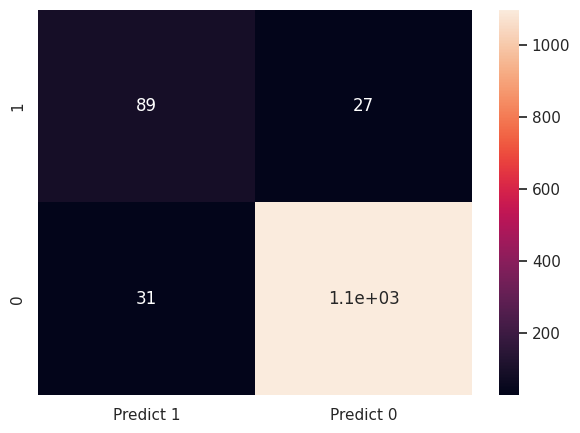

In [195]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [196]:
print('Recall = ', sklearn.metrics.recall_score(y_test,predicted_labels, average = 'weighted'))
print('Precision = ', sklearn.metrics.precision_score(y_test,predicted_labels, average = 'weighted'))

Recall =  0.9534136546184739
Precision =  0.9541665327978581


# **Gradient Boosting**

In [197]:
# Fit model on training data
grad = GradientBoostingClassifier(n_estimators = 50, random_state = 1)
grad.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [198]:
predicted_labels = grad.predict(x_test)

In [199]:
# Find the score
print(grad.score(x_train, y_train))
print(grad.score(x_test, y_test))

0.992235609103079
0.98714859437751


In [200]:
# Find Features Importance
print(pd.DataFrame(grad.feature_importances_, columns = ['Imp'], index = x_train.columns))

                          Imp
ZipScore             0.023060
Age                  0.002279
CustomerSince        0.000076
HighestSpend         0.352596
HiddenScore          0.153936
MonthlyAverageSpend  0.063107
Level                0.395665
Mortgage             0.001421
Security             0.000000
FixedDepositAccount  0.007387
InternetBanking      0.000371
CreditCard           0.000101


Confusion Matrix


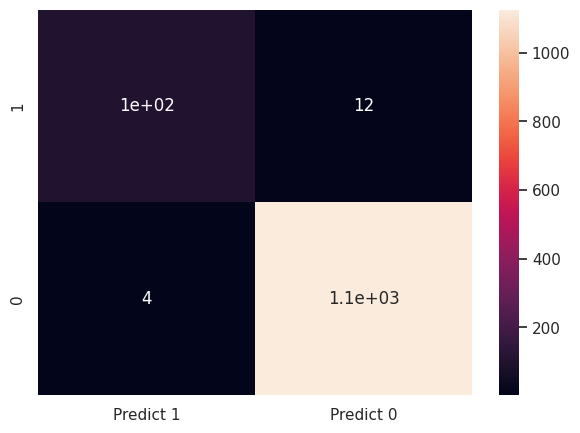

In [201]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [202]:
print('Recall = ', sklearn.metrics.recall_score(y_test,predicted_labels, average = 'weighted'))
print('Precision = ', sklearn.metrics.precision_score(y_test,predicted_labels, average = 'weighted'))

Recall =  0.98714859437751
Precision =  0.9869784228284191


# **Naive Bayes**

In [168]:
naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [169]:
#predict on test
predicted_labels = naive.predict(x_test)

In [170]:
# Find the score
print(naive.score(x_train, y_train))
print(naive.score(x_test, y_test))

0.8912985274431058
0.8843373493975903


In [172]:
#Performance metrics in test set
model_score = naive.score(x_test, y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.8843373493975903
Recall =  0.6120689655172413
Precision =  0.4176470588235294


Naive Bayes is giving us an Accuracy of 89% with 61% recall and 41% precision. This is definitely poor as compared to Logistics Regression Model. Let us see if probability cut off can improve this.

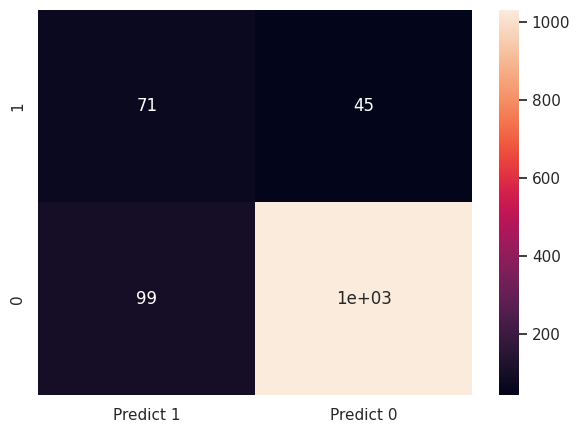

In [173]:
#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [203]:
y_probability = naive.predict_proba(x_test)[:,1]

In [204]:
y_probability

array([5.87236203e-05, 6.10901539e-01, 9.27787410e-06, ...,
       4.83120679e-01, 5.85600570e-06, 7.52200556e-05])

In [205]:
pd.crosstab(y_test,(y_probability > 0.25).astype(int))

col_0          0    1
LoanOnCard           
0           1011  118
1             29   87

In [206]:
print('Accuracy= ', (1006+96)/(1006+96+107+36))
print('Recall= ', 96/(36+96))
print('Precision= ', 96/(96+107))

Accuracy=  0.885140562248996
Recall=  0.7272727272727273
Precision=  0.4729064039408867


With probability cut off at 0.25 we are getting 88% accuracy with 72% recall. However the precision is only 47%

In [207]:
#Generating Classification report at default probability cutoff
print("Classification Report")
print(sklearn.metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.42      0.61      0.50       116
           0       0.96      0.91      0.93      1129

    accuracy                           0.88      1245
   macro avg       0.69      0.76      0.72      1245
weighted avg       0.91      0.88      0.89      1245



Among the two trained model Logistic Regression is better in all evaluation metrics that was considered

The logistic regression model that was trained using the explicit class weight (0:1 and 1:4) to handle unbalanced class distribution gave the best results. The model was selected keeping in mind the business objective of better conversion rates for borrowers. This model gave good accuracy and recall with decent precision.

Naive Bayes model also had an accuracy of 89% but the recall and precision was low as compared to the LR model. By changing the probability cut off, we were able to improve the recall but the precision went down even further. Overall LR model performed much better the NB and hence that can be considered as the final model.

The initial training data was highly unbalanced with only 10% cases that has a LoanOnCard. Highly unbalanced data effects the performance of predictive model. There are mathematical techniques such as class weights to handle unbalanced data but there is obvious limit to the improvements that can be achieved through these techniques. While creating data samples effort should be made to get sufficient examples of cases that we want our model to predict. Atleast 25-30% representation of minority class in the entire dataset can significantly improve the quality of the model.

# **finding best model**

In [208]:
logic = LogisticRegression(solver = 'liblinear')
KNN=KNeighborsClassifier(n_neighbors=7, weights = 'distance')
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
bag = BaggingClassifier(base_estimator = dtree, n_estimators = 50, random_state = 1)
random = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 3)
ab = AdaBoostClassifier(n_estimators = 10, random_state = 1)
grad = GradientBoostingClassifier(n_estimators = 50, random_state = 1)
naive = GaussianNB()

In [210]:
seed = 8
# prepare models
models = []
models.append(('LR', logic))
models.append(('KNN', KNN))
models.append(('DT', dtree))
models.append(('Bag', bag))
models.append(('RF', random))
models.append(('AB', ab))
models.append(('GB', grad))
models.append(('NB', naive))

In [211]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.953614 (0.006504)
KNN: 0.913052 (0.008982)
DT: 0.982932 (0.006041)
Bag: 0.989357 (0.004217)
RF: 0.989357 (0.004404)
AB: 0.967871 (0.006898)
GB: 0.987349 (0.004756)
NB: 0.890161 (0.011502)


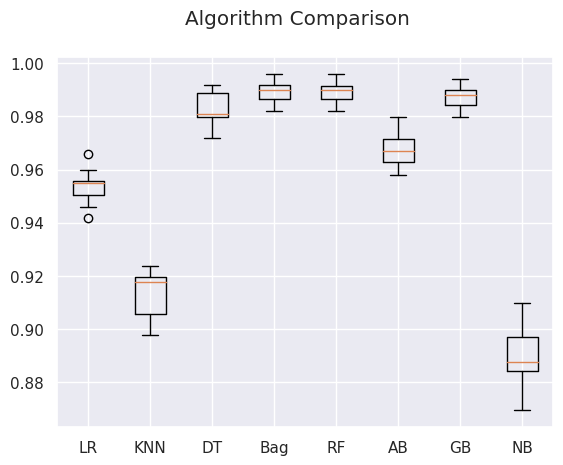

In [212]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()